# Homework 2

## Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('./mnist_train_data.csv', header= None)
y_train = pd.read_csv('./mnist_train_labels.csv', names=['labels'])
X_test = pd.read_csv('./mnist_test_data.csv', header= None)
y_test = pd.read_csv('./mnist_test_labels.csv', names=['labels'])

## Generative Learning

Problem 1:

In [3]:
# Prior label probabilities:
print(y_train['labels'].value_counts().sort_index()/len(y_train))
prior_probs = y_train['labels'].value_counts().sort_index()/len(y_train)

prior_prob_list = prior_probs.tolist()

0    0.098667
1    0.111833
2    0.096833
3    0.101333
4    0.103833
5    0.085667
6    0.101333
7    0.108500
8    0.091833
9    0.100167
Name: labels, dtype: float64


Problem 2:

In [20]:
total_train = pd.concat([X_train, y_train], axis = 1)
prob_tab = np.zeros(shape=[10, 784])
 
for i in np.sort(y_train['labels'].unique()):
    a = total_train.loc[total_train['labels'] == i]
    # Remove label column
    a = a.drop('labels', 1)
    sum_val = (a.values).sum(axis = 0)
   
    # Laplacian smoothing
    probabilities = (sum_val +1 ) / (a.shape[0] + 2)
    prob_tab[i, :] = probabilities
    print ("Max Pji for label", i,   " = ",probabilities.max())

log_prob_tab = np.log(prob_tab.T)

Max Pji for label 0  =  0.851851851852
Max Pji for label 1  =  0.98514115899
Max Pji for label 2  =  0.728987993139
Max Pji for label 3  =  0.808196721311
Max Pji for label 4  =  0.8496
Max Pji for label 5  =  0.711240310078
Max Pji for label 6  =  0.849180327869
Max Pji for label 7  =  0.794793261868
Max Pji for label 8  =  0.875226039783
Max Pji for label 9  =  0.867330016584


Problem 3:

In [23]:
mm_l = np.matmul(X_test, log_prob_tab)
mm_r = np.matmul((1-X_test), np.log(1-prob_tab).T )

final_matrix = np.add((mm_l+mm_r), np.log(prior_prob_list))
y_pred = np.argmax(final_matrix, axis = 1)

In [24]:
from sklearn import metrics
import itertools
print('The accuracy is', metrics.accuracy_score(y_test, y_pred))

The accuracy is 0.809


In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Problem 4:

[[ 74   0   0   0   0   5   2   0   4   0]
 [  0 120   0   0   0   4   1   0   1   0]
 [  1   7  88   4   0   1   2   3   8   2]
 [  0   2   1  86   1   6   3   2   3   3]
 [  1   1   1   0  83   0   2   0   1  21]
 [  3   1   1  11   2  62   2   3   1   1]
 [  3   0   4   0   3   4  73   0   0   0]
 [  0   6   2   0   3   1   0  77   3   7]
 [  0   2   2   9   4   3   1   2  61   5]
 [  0   1   0   1   4   0   0   0   3  85]]


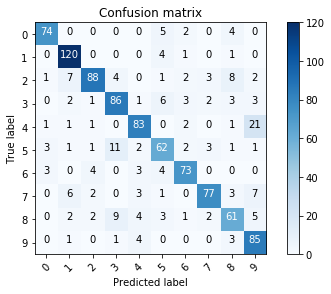

In [26]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=np.sort(y_test['labels'].unique()),
                      title='Confusion matrix')

According to the confusion matrix, we can see that the biggest misclassification pairs are:

* 4 being misclassified as a 9 (21 times)
* 5 being misclassified as a 3 (11 times)
* 8 being misclassified as a 3 (9 times)

In [30]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

Problem 5:

In [32]:
index_error = np.array(np.where((y_test['labels'] != y_pred)==True))[0]

/Users/kkannapp/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


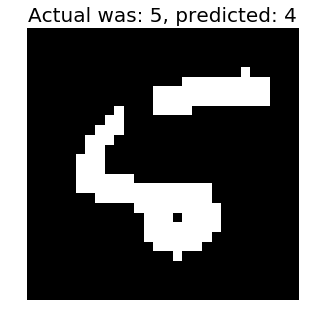

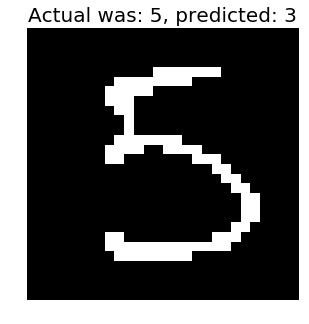

In [33]:
incorrect = index_error[:2]
actual = y_test.iloc[incorrect]['labels']
miss = y_pred[incorrect]
for i in range(len(incorrect)):
    b = incorrect[i]
    plt.figure(figsize=(10,5))
    plt.title('Actual was: %i, predicted: %i' % (actual.iloc[i], miss[i]), fontsize = 20)
    displaychar(X_test.iloc[b]);

Breast Cancer Data for problems 6,7:

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
bc = load_breast_cancer()
X, X_test, y, y_test = train_test_split(bc.data, bc.target, test_size=0.4, random_state= 5)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state= 5)
print('Train', y_train.shape, 'Valid', y_valid.shape, 'Test', y_test.shape)

# For final predictions:
X_train_fin = np.concatenate((X_train,X_valid))
y_train_fin = np.concatenate((y_train,y_valid))

Train (228,) Valid (113,) Test (228,)


Problem 6:

In [51]:
from sklearn.mixture import GaussianMixture
best_acc = 0
cov_parameter = ['spherical', 'tied', 'diag', 'full']
for i in cov_parameter:
    clf = GaussianMixture(n_components=2, covariance_type = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    accuracy = np.sum(y_pred == y_valid)*1.0/len(y_valid)
    print('For criterion =', i, 'the validation accuracy = ' + str(accuracy))
    if (accuracy > best_acc):
        best_cov = i
        best_acc = accuracy
print('The best criterion is', best_cov, 'with a validation accuracy of', best_acc)

clf = GaussianMixture(n_components=2, covariance_type = best_cov)
clf.fit(X_train_fin, y_train_fin)
predictions = clf.predict(X_test)
fin_accuracy = metrics.accuracy_score(y_test, predictions)
print('\n')
print('Final accuracy on total training data = ' + str(fin_accuracy))

For criterion = spherical the validation accuracy = 0.115044247788
For criterion = tied the validation accuracy = 0.212389380531
For criterion = diag the validation accuracy = 0.0973451327434
For criterion = full the validation accuracy = 0.83185840708
The best criterion is full with a validation accuracy of 0.83185840708


Final accuracy on total training data = 0.938596491228


Problem 7:

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_fin, y_train_fin)
predictions = clf.predict(X_test)
print('The test accuracy = ' + str(sum(predictions == y_test)/len(y_test)))

The test accuracy = 0.964912280702


In [59]:
print('The transformation matrix is \n', clf.coef_)
print('\n')
print('The intercept is', clf.intercept_[0])

The transformation matrix is 
 [[  1.35e+00  -1.27e-01  -1.36e-01  -2.44e-04  -2.24e+01   8.56e+01
    1.39e+01  -1.22e+02   1.60e+01   7.43e+00  -1.48e+01   4.83e-01
    1.73e+00  -1.64e-02  -4.69e+02  -1.96e+00   1.60e+01  -9.78e+01
   -6.14e+01   5.59e+02  -1.26e+00  -2.00e-01  -2.62e-01   1.93e-02
    3.19e+01   4.09e+00  -1.27e+01  -9.32e+00  -1.49e+01  -1.72e+02]]


The intercept is 51.8553297822


## Evaluating Classifiers

Problem 8:

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

# Last 1300 as training, beginning 497 as test
X_train = digits.data[:497]
y_train = digits.target[:497]
X_test = digits.data[497:]
y_test = digits.target[497:]

(1797, 64)


In [64]:
# Fit the model:
clf = KNeighborsClassifier(n_neighbors=5, metric = 'chebyshev')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation metrics:
TP = sum(y_pred[y_test == 3] == 3)
FP = sum(y_pred[y_test != 3] == 3)
TN = sum(y_pred[y_test != 3] != 3)
FN = sum(y_pred[y_test == 3] != 3)

In [67]:
print('Specificity:', TN/(TN+FP))
print('Sensitivity:', TP/(TP+FN))
print('True Positive Rate (TPR):', TP/(TP+FN))
print('True Negative Rate (TNR):', TN/(TN+FP))
print('False Negative Rate (FNR):', FN/(TP+FN))
print('False Positive Rate (FPR):', FP/(FP+TN))
print('Precision:', TP/(TP+FP))
print('Recall:', TP/(TP+FN))

Specificity: 0.988888888889
Sensitivity: 0.869230769231
True Positive Rate (TPR): 0.869230769231
True Negative Rate (TNR): 0.988888888889
False Negative Rate (FNR): 0.130769230769
False Positive Rate (FPR): 0.0111111111111
Precision: 0.896825396825
Recall: 0.869230769231


From my experience, these are exceptional evaluation metrics!

## Regression

Problem 9:

In [70]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# Form data-set:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.1, random_state = 10)

In [71]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print('Test MSE:', metrics.mean_squared_error(y_test, predictions))
print('Test MAE:', metrics.mean_absolute_error(y_test, predictions))

Test MSE: 2155.96465103
Test MAE: 36.3181336987


Problem 10:

In [73]:
for i in range(10):
    X_ablation = np.delete(diabetes.data, [i], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X_ablation, diabetes.target, test_size = 0.1, random_state = 10)
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print('Removing feature', i, ', test MSE:', metrics.mean_squared_error(y_test, predictions))

Removing feature 0 , test MSE: 2152.80664218
Removing feature 1 , test MSE: 2259.13307937
Removing feature 2 , test MSE: 2783.51448185
Removing feature 3 , test MSE: 2424.772348
Removing feature 4 , test MSE: 2187.59951938
Removing feature 5 , test MSE: 2167.51760615
Removing feature 6 , test MSE: 2159.15148251
Removing feature 7 , test MSE: 2153.06317113
Removing feature 8 , test MSE: 2335.17338461
Removing feature 9 , test MSE: 2165.86619219


Problem 11:

Feature 2 is the most valuable, as indicated by that the model has its test MSE increase the most without the feature included.